In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

from math import *
import numpy as np
import h5py

from opc import *

In [2]:
help(SingleComponentBeam)

Help on class SingleComponentBeam in module opc:

class SingleComponentBeam(builtins.object)
 |  SingleComponentBeam(f, nx, ny, dx, dy)
 |  
 |  This class describes an optical beam sampled at on observation plane
 |  perpendicular to the direction of propagation. Only one frequency
 |  component is described, for polychromatic beams several objects of
 |  this class need to be combined.
 |  
 |  The optical beam is given by an array of complex amplitudes on a rectangular grid.
 |  The amplitude refers to the elektric field strength. The power density is the
 |  square of the absolute value of the amplitude.
 |  The dimensions of that grid are given when creating the beam object.
 |  Both values should be integer powers of 2 in order to allow fast Fourier transforms.
 |  
 |  The amplitudes are stored in a 2-dim complex-valued NumPy array.
 |  To ease the Fourier transforms the array are stored in an unconventional order.
 |  The index=0 elements always refer to the center of the beam 

# Single-Frequency content of the radiation field
# recorded on a screen in a TEUFEL run

### Get the file name:
Instead of using a fixed path string one can use a Tk dialog
to browse for the file to be read.

In [2]:
radfile = "/home/lehnertu/Programming/teufel/elbe-u300_screen_5m.h5"

In [4]:
from tkinter import Tk
from tkinter import filedialog

Tk().withdraw()
radfile = filedialog.askopenfilenames()[0]
print(radfile)

/home/ulf/Programming/teufel/elbe-u300_screen_10m.h5


### Read the file, import the data and report the geometry:

In [4]:
help(ImportTeufelSingleFrequency)

Help on function ImportTeufelSingleFrequency in module opc:

ImportTeufelSingleFrequency(filename, freq)
    Create SingleComponentBeam() objects importing fields on a rectangular screen
    from a TEUFEL calculation. A list of two beams [beam_S, beam_P] is returned
    containing the two polarization directions.



The frequency is coaxed to the nearest frequency in the FFT raster of the given data.<br>
The two polarization directions are taken as the alignment vectors of the screen.<br>
Longitudinal fields are neglected.<br>
Only the amplitude of the E field is considered because the
B fields should be linked to E by Maxwells equations.

In [5]:
[beam_S, beam_P] = ImportTeufelSingleFrequency(radfile, 1.0e12)
print("P=(%.3g, %.3g)" % (beam_S.TotalPower(),beam_P.TotalPower()))

Nx=41 Ny=41
t0=3.33564e-08 dt=1e-13 NOTS=1000
P=(2.27e+11, 3.55e+10)


(41, 41)


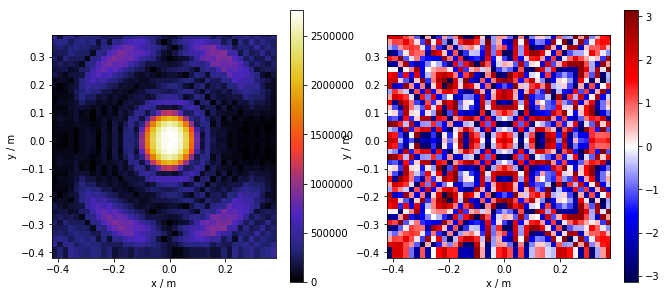

In [8]:
print(beam_S.shape())
beam_S.plot()
plt.show()

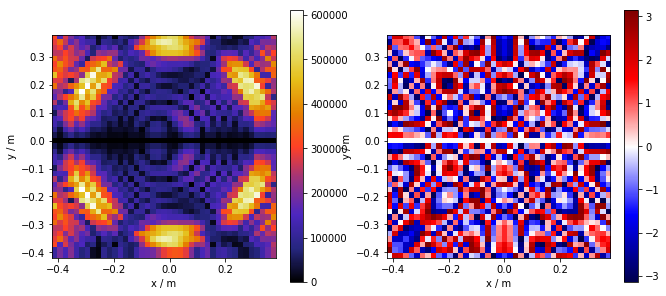

In [7]:
beam_P.plot()
plt.show()

In [9]:
print(beam_S.FitSizeW(order=2))
print(beam_S.FitSizeW(order=4))
print(beam_S.FitSizeW(order=6))
print(beam_S.FitSizeW(order=8))
print(beam_S.FitSizeW(order=10))
print(beam_S.FitSizeW(order=12))

(0.5101323990201803, 1.3114390694485056)
(0.3431659131393609, 0.7709207347242609)
(0.2095915893687736, 0.1763644322187871)
(0.10567936626808384, 0.10330306879031832)
(0.08102229159714174, 0.08345257685269342)
(0.075009254856765, 0.08164684420980456)


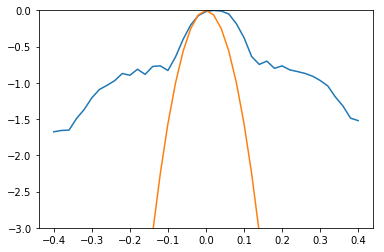

In [10]:
pos, amp = beam_S.Projection(axis='x')
amp = np.log(amp)
amp = amp - np.max(amp)
w = 0.08
gauss = -1.0/(w*w)*np.power(pos,2)
plt.plot(pos,amp)
plt.plot(pos,gauss)
plt.ylim(-3,0)
plt.show()

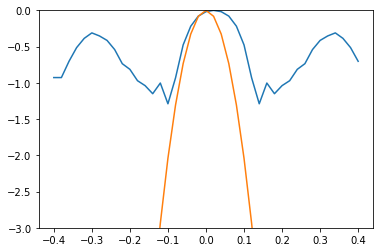

In [11]:
pos, amp = beam_S.Projection(axis='y')
amp = np.log(amp)
amp = amp - np.max(amp)
w = 0.07
gauss = -1.0/(w*w)*np.power(pos,2)
plt.plot(pos,amp)
plt.plot(pos,gauss)
plt.ylim(-3,0)
plt.show()

In [12]:
print(beam_S.FitSizeW(order=2, threshold=-1.5))
print(beam_S.FitSizeW(order=4, threshold=-1.5))
print(beam_S.FitSizeW(order=6, threshold=-1.5))
print(beam_S.FitSizeW(order=8, threshold=-1.5))

(0.37467225478815785, 0.40633622994847224)
(0.19813901125152955, 0.2333727224722755)
(0.08885280608127875, 0.09959628513830468)
(0.08768434415661641, 0.09408860184390212)


## plot a Gaussian beam as reference

In [15]:
help(SingleComponentBeam.GaussianBeam)

Help on method GaussianBeam in module opc:

GaussianBeam(f, nx, ny, dx, dy, zR, z) method of builtins.type instance
    Create a gaussian beam with a Rayleigh range zR
    at a distance z from the waist (both polarization directions are equal).
    z cannot be exactly zero.



The eqivalent Gaussian beam shows a waist at the undulator center.
The Rayleigh length is about one fourth the undulator length.

λ = 0.299792 mm
k = 20958.450220 m⁻¹
w0 = 7.566779 mm
w = 63.508874 mm
R = 5.072000 m
(128, 128)
0.02 0.02
(0.06350887423830495, 0.06350887423830483)


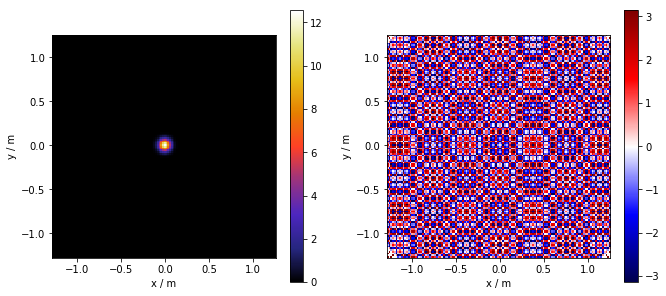

In [23]:
gb = SingleComponentBeam.GaussianBeam(1.0e12, 128, 128, beam_S.dx, beam_S.dy, 0.6, 5.0)
print(gb.shape())
print(gb.dx, gb.dy)
print(gb.FitSizeW())
gb.plot()
plt.show()

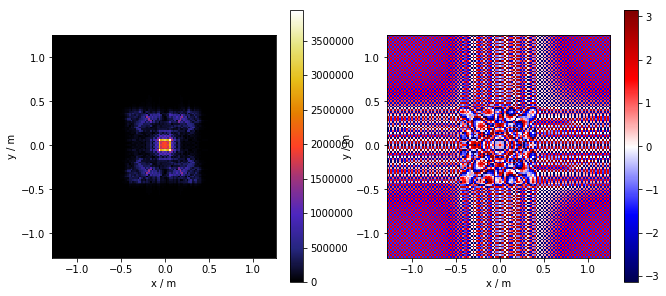

In [17]:
beam_S.pad(128,128)
propagated = beam_S.NearFieldProp(5.0)
propagated.plot()
plt.show()

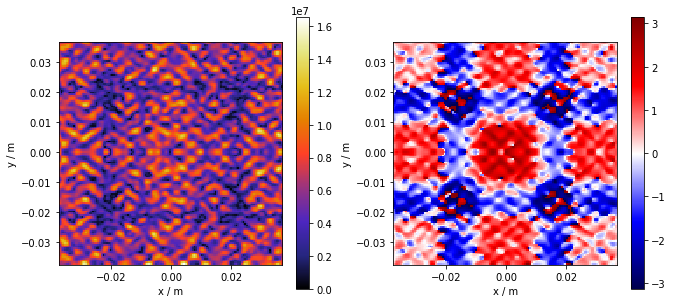

In [18]:
propagated = beam_S.FarFieldProp(5.0)
propagated.plot()
plt.show()

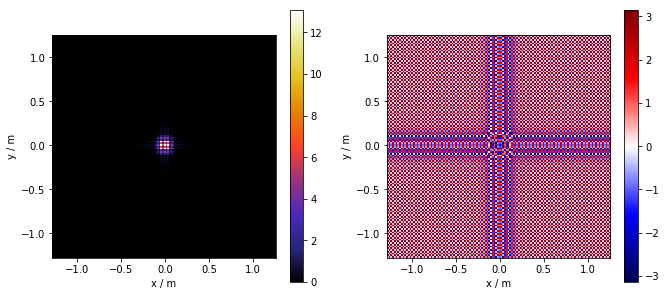

In [19]:
gbprop = gb.NearFieldProp(5.0)
gbprop.plot()
plt.show()

0.00058553214453125 0.00058553214453125
(128, 128)


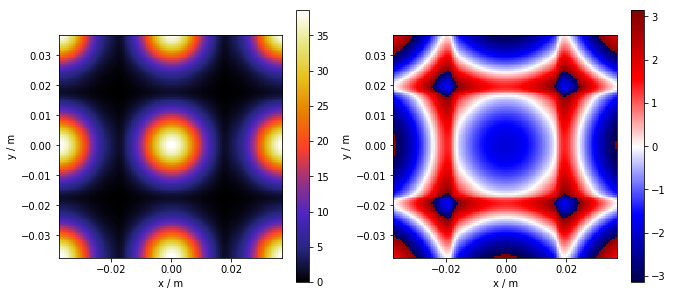

In [25]:
gbprop = gb.FarFieldProp(5.0)
print(gbprop.dx, gbprop.dy)
print(gbprop.shape())
gbprop.plot()
plt.show()

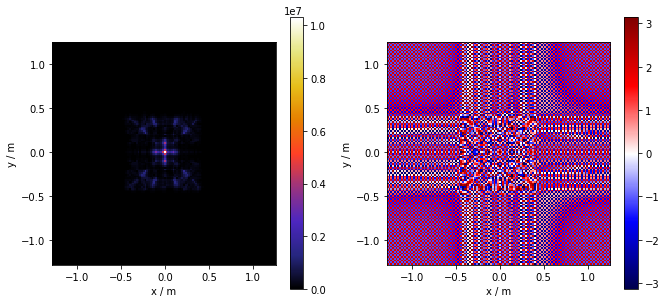

In [26]:
propagated = beam_S.NearFieldProp(-5.0)
propagated.plot()
plt.show()

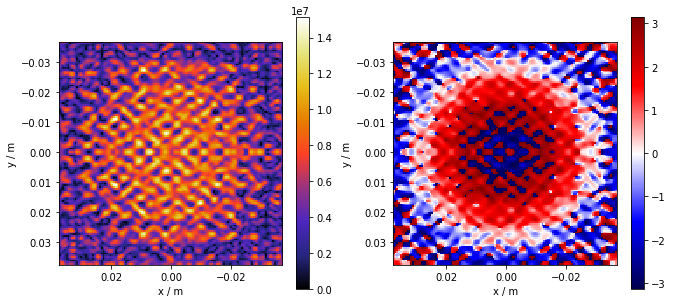

In [27]:
propagated = beam_S.FarFieldProp(-5.0)
propagated.plot()
plt.show()